In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("googleplaystore.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [75]:
df_sizinst = df[["Size","Installs"]]
df_sizinst["Size"] = df_sizinst["Size"].str.replace('M', '')
df_sizinst["Installs"] = df_sizinst["Installs"].str.replace(',','')
df_sizinst["Installs"] = df_sizinst["Installs"].str.replace('+','')
df_sizinst = df_sizinst.apply(pd.to_numeric, errors='coerce')
df_sizinst = df_sizinst.dropna(axis = 0)
df_sizinst.head()
df_sizinst.info()
df_sizains = df_sizinst

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8829 entries, 0 to 10839
Data columns (total 2 columns):
Size        8829 non-null float64
Installs    8829 non-null int64
dtypes: float64(1), int64(1)
memory usage: 206.9 KB


In [7]:
df_sizinst = df_sizinst.groupby(['Size','Installs']).size().reset_index()
df_sizinst.columns.values[2] = 'freq'
df_sizinst.head(10)

,Size,Installs,freq
0,1.0,10,1
1,1.0,500,2
2,1.0,1000,1
3,1.0,5000,1
4,1.0,50000,1
5,1.0,100000,1
6,1.1,10,2
7,1.1,50,1
8,1.1,100,1
9,1.1,500,3


<Figure size 1440x1440 with 0 Axes>

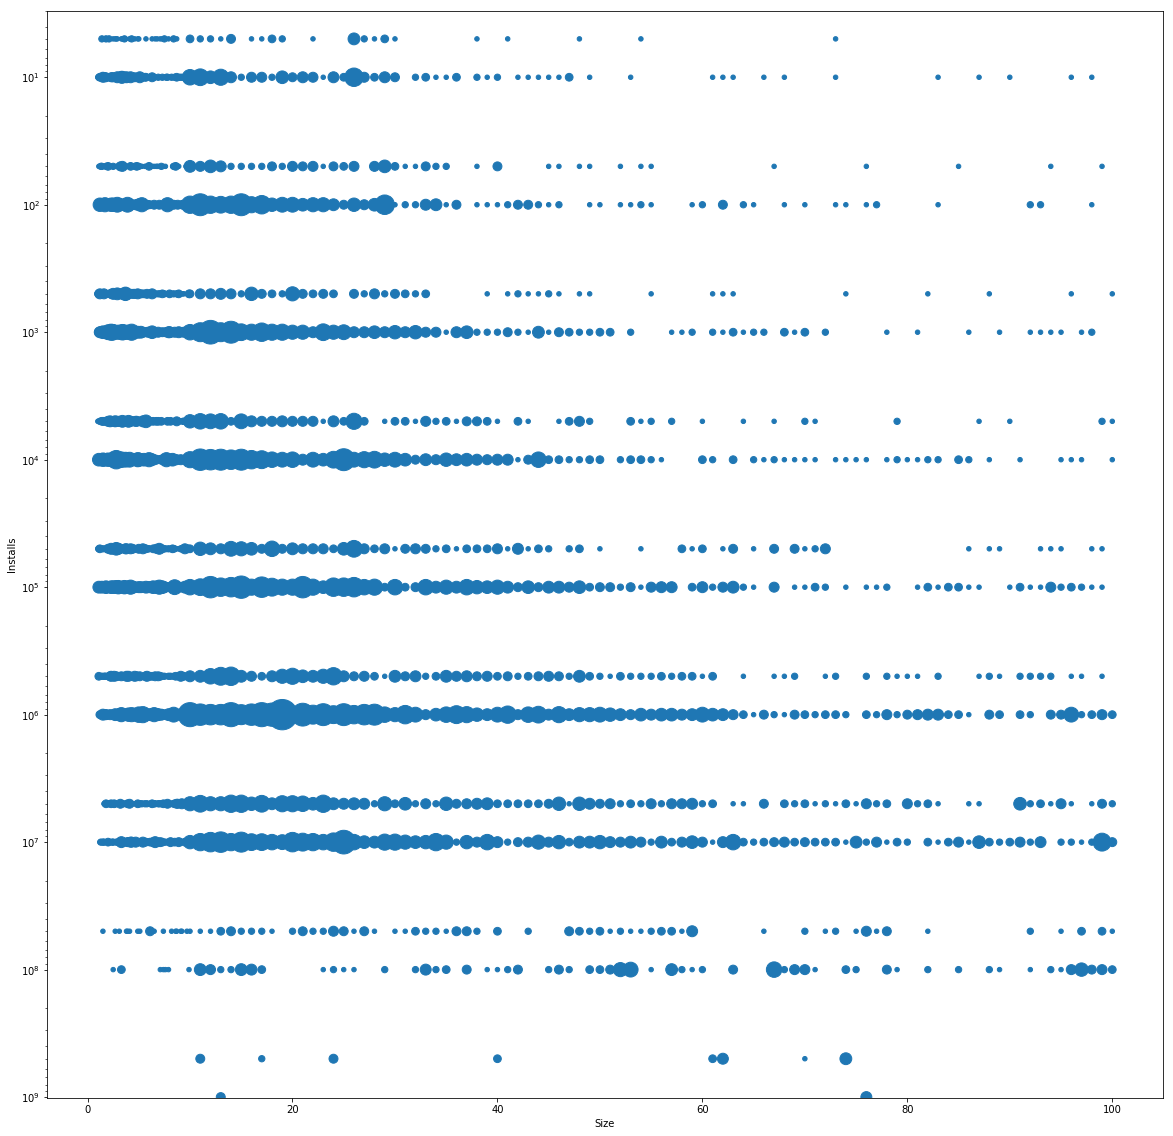

In [8]:
plt.figure(figsize=(20,20))
df_sizinst.plot(kind = "scatter",x = "Size", y="Installs", s = df_sizinst['freq']*20, figsize=(20,20),logy=True,ylim=(0,10^9))
plt.show()
#sns.scatterplot(data = df_sizinst,x = "Size", y="Installs")

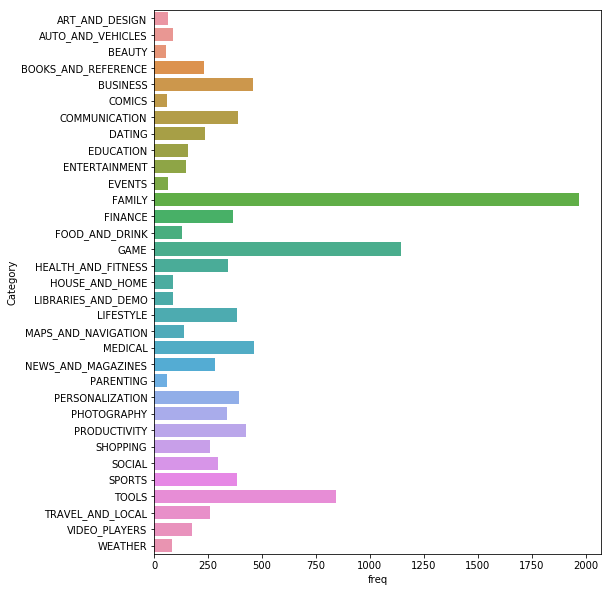

In [9]:
df_cat = df[["Category"]]
df_cat = df_cat.groupby("Category").size().to_frame().reset_index()
df_cat.columns.values[1] = 'freq'
df_cat.head()
plt.figure(figsize=(8,10))
sns.barplot(data = df_cat, x ='freq', y= 'Category')

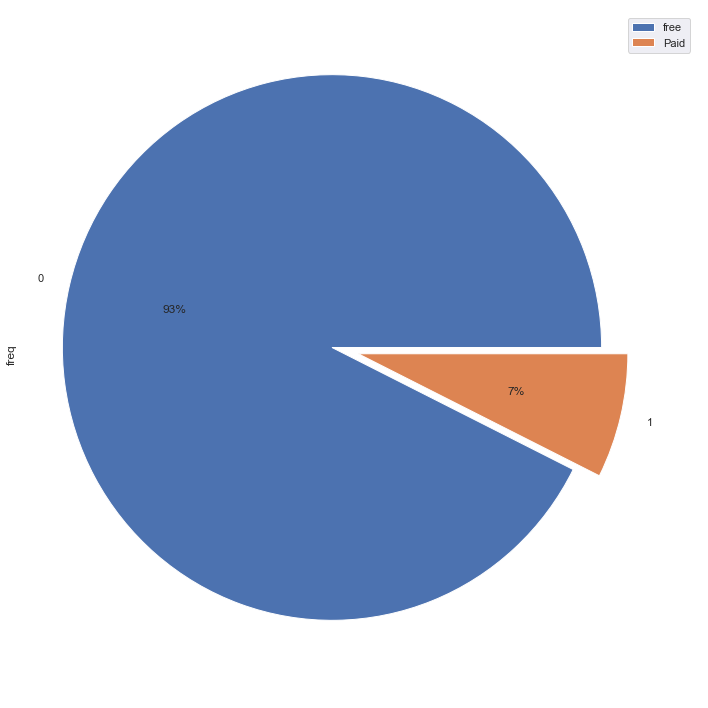

In [103]:
df_type = df[["Type"]]
df_type = df_type.groupby("Type").size().to_frame().reset_index()
df_type.columns.values[1] = 'freq'
df_type.plot.pie(y= "freq",autopct='%1.0f%%',figsize = (10,10),explode=(0.1,0))
plt.legend(['free','Paid'])
plt.tight_layout()

In [76]:
df_sizainsfreq = df_sizains.groupby("Size").size().to_frame().reset_index()

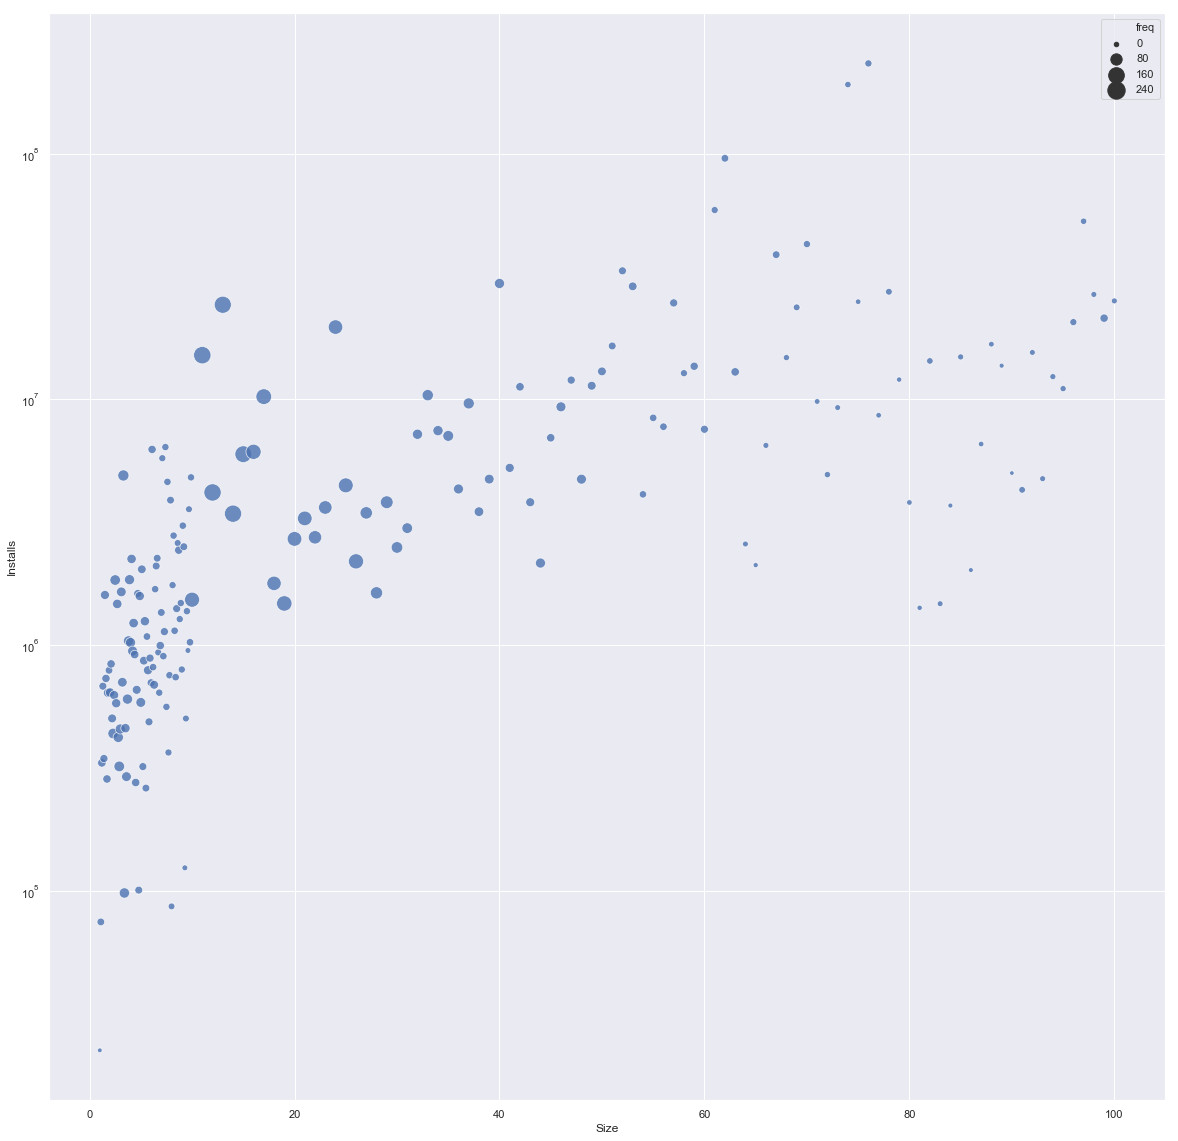

In [93]:
df_sizains = df_sizains.groupby("Size").mean().reset_index()
df_sizains['freq'] = df_sizainsfreq[0]
df_sizains
plt.yscale("log")
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(data = df_sizains, x="Size",y="Installs",size = df_sizains['freq'],sizes=(20, 300),alpha = 0.8)
df_sizains = df_sizains.set_index("Size")